# A measurement of the dark energy equation of state with 40 strong lenses

Natalie B. Hogg

This notebook produces the figures of the above titled paper. The chains to produce the figures are all saved in the `chains` directory of the `slide` repository; alternatively you can reproduce the MCMC chains by running the yaml files provided in the `yaml_files` directory with Cobaya (complete instructions can be found in the [Cobaya docs](https://cobaya.readthedocs.io/en/latest/), or in the [example notebook](https://github.com/nataliehogg/tdcosmo_ext/blob/main/example_notebook.ipynb) in the `tdcosmo_ext` repository).

Requirements: [GetDist](https://getdist.readthedocs.io/en/latest/), [emcee](https://emcee.readthedocs.io/en/stable/), [ChainConsumer](https://samreay.github.io/ChainConsumer/). With thanks to [colorbrewer](https://colorbrewer2.org) for colour palette inspiration.

In [1]:
import numpy as np
from getdist import loadMCSamples, plots
from chainconsumer import ChainConsumer
from matplotlib import rc
import emcee

%matplotlib inline

rc('text', usetex=True)
rc('font', family='serif')

path = '/home/natalie/Projects/slide/public_repo/chains/'

# remove first 30% of all chains
burn_in = 0.3

# Replication of original TDCOSMO IV results

Here I plot my `tdc_lcdm` chains along with the original TDCOSMO results, replicating the purple contours of TDCOSMO IV Figure 7. Since the TDCOSMO IV chains were generated with `emcee` and mine were generated with the MCMC sampler in `Cobaya`, I use `ChainConsumer` to plot them together. For the rest of the figures, I use GetDist. The TDCOSMO IV chains can be found on the [TDCOSMO repository](https://github.com/TDCOSMO/hierarchy_analysis_2020_public).

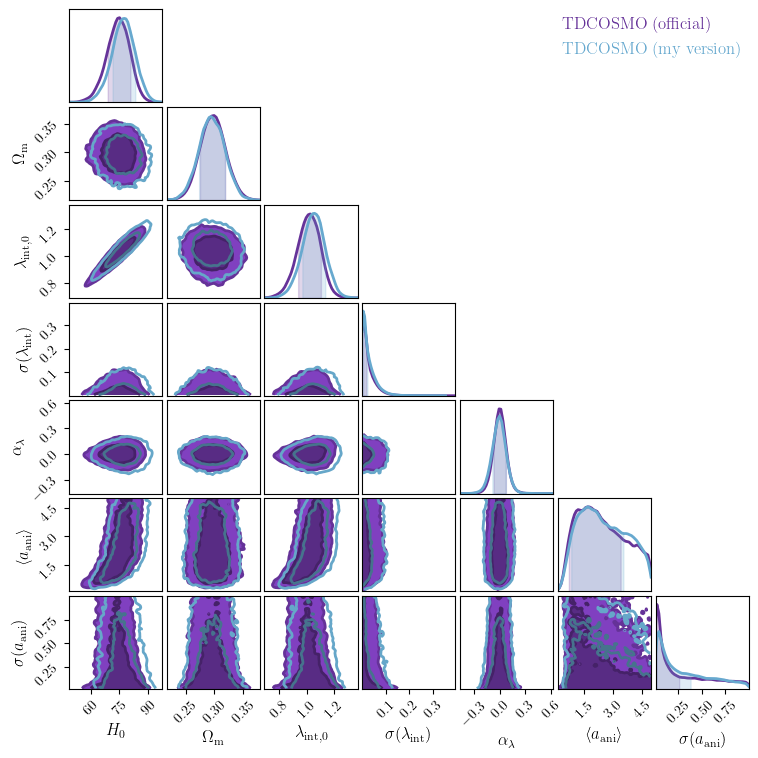

In [2]:
c = ChainConsumer()

params = [r'$H_0$', r'$\Omega_{\rm m}$', 
          r'$\lambda_{\rm int, 0}$', r'$\sigma(\lambda_{\rm int})$',
          r'$\alpha_{\lambda}$', r'$ \langle a_{\rm ani} \rangle$',
          r'$\sigma(a_{\rm ani})$']

# start with the emcee-generated chain
# load in an h5 file using emcee
reader = emcee.backends.HDFBackend(path + 'tdcosmo_chain_alpha_free_om.h5')

# discard 400 steps of burn in (as done in TDCOSMO IV) and flatten and thin the samples
official = reader.get_chain(discard=400, flat=True, thin=True)

param_inds = [0,1,2,3,4,5,6] 

# add the chain to chain consumer
c.add_chain([official[:,ind] for ind in param_inds], walkers = 100, parameters = params, name='TDCOSMO (official)')

# now for the cosmomc/cobaya-generated chain; we have to remove burn-in by hand when using chainconsumer
# count the lines of the txt file to be loaded
num_lines = sum(1 for _ in open(path + 'tdc_lcdm.1.txt'))

# compute 30% of the number of lines; these will be removed as burn in
burn_in = (num_lines/100)*30

# load in a text chain file and declare which columns you want to use
# the column numbers correspond to the various parameters used in the MCMC
# you can do e.g. $ head -1 tdc_lcdm.1.txt to see which column number corresponds to which parameter
# and order them in the right order to match the other chain
cols = (7,10,2,3,4,5,6)
my_version = np.genfromtxt(path + 'tdc_lcdm.1.txt', skip_header=int(burn_in), delimiter = None, usecols=cols)

# add the chain to chain consumer
c.add_chain(my_version, parameters=params, name='TDCOSMO (my version)')

colors = ['#663399', '#67a9cf']

# some chain consumer settings
c.configure(smooth = True, 
            spacing = 1.0, 
            max_ticks = 4, 
            colors = colors, 
            shade_gradient = 0.6,
            shade_alpha=[1.0, 0.0],
            bar_shade = True, 
            linewidths = [2.0]*len(colors),
            usetex = True, serif = True)

fig = c.plotter.plot(figsize=(8,8))

We can see that the posteriors generated using my implementation of the likelihood in `Cobaya` are an excellent match to the original TDCOSMO IV result, thus validating the implementation.

# Figure 1 and parameter values

H_0 = 76.8^{+6.4}_{-5.6}
H_0 = 68.7^{+3.4}_{-3.9}


<Figure size 600x450 with 0 Axes>

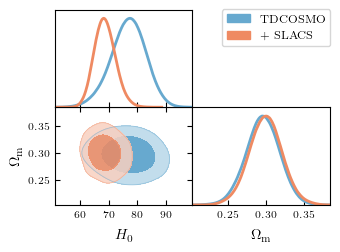

In [3]:
tdc = loadMCSamples(path + 'tdc_lcdm', settings={'ignore_rows':burn_in})

tdc_slacs = loadMCSamples(path + 'tdc_slacs_lcdm', settings={'ignore_rows':burn_in})

samples = [tdc, tdc_slacs]

labels = ['TDCOSMO', '+ SLACS']

g = plots.get_single_plotter()

params = ['H0', 'omegam']

colors = ['#67a9cf', '#ef8a62']

g.settings.fig_width_inch = 3.5

g.triangle_plot(samples, params, filled = True, contour_colors = colors, contour_lws=2, legend_labels=labels)

print(tdc.getInlineLatex('H0', limit=1))
print(tdc_slacs.getInlineLatex('H0', limit=1))

# Figure 2 and parameter values

H_0 = 78.4^{+8.3}_{-6.3}
w < -1.75


<Figure size 600x450 with 0 Axes>

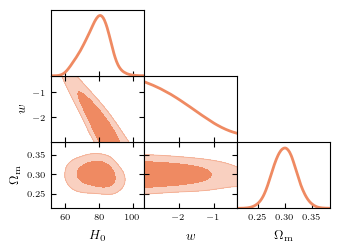

In [4]:
tdc_slacs = loadMCSamples(path + 'tdc_slacs_wcdm', settings={'ignore_rows':burn_in})

samples = [tdc_slacs]

g = plots.get_single_plotter()

params = ['H0', 'w', 'omegam']

colors = ['#ef8a62']

g.settings.fig_width_inch = 3.5

g.triangle_plot(samples, params, filled = True, contour_colors = colors, contour_lws=2)

print(tdc_slacs.getInlineLatex('H0', limit=1))
print(tdc_slacs.getInlineLatex('w', limit=1))

# Figure 3 and parameter values

H_0 = 79.6^{+7.5}_{-6.0}
w_0 < -1.86
w_a < 0.102


<Figure size 600x450 with 0 Axes>

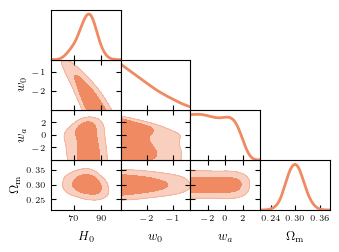

In [5]:
tdc_slacs = loadMCSamples(path + 'tdc_slacs_w0wa', settings={'ignore_rows':burn_in})

samples = [tdc_slacs]

g = plots.get_single_plotter()

params = ['H0', 'w0', 'wa', 'omegam']

colors = ['#ef8a62']

g.settings.fig_width_inch = 3.5

g.triangle_plot(samples, params, filled = True, contour_colors = colors, contour_lws=2)

print(tdc_slacs.getInlineLatex('H0', limit=1))
print(tdc_slacs.getInlineLatex('w0', limit=1))
print(tdc_slacs.getInlineLatex('wa', limit=1))

# Figure 4

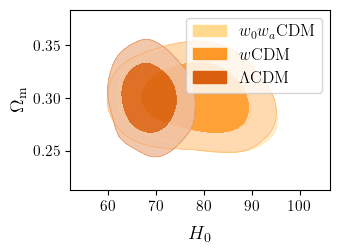

In [6]:
lcdm = loadMCSamples(path + 'tdc_slacs_lcdm', settings={'ignore_rows':burn_in})
wcdm = loadMCSamples(path + 'tdc_slacs_wcdm', settings={'ignore_rows':burn_in})
w0wa = loadMCSamples(path + 'tdc_slacs_w0wa', settings={'ignore_rows':burn_in})

samples = [w0wa, wcdm, lcdm]

labels = [ r'$w_0w_a$CDM', r'$w$CDM', r'$\Lambda$CDM']

g = plots.get_single_plotter(width_inch=3.5)

params = ['H0', 'omegam']

colors = ['#fed98e', '#fe9929', '#d95f0e']

g.plot_2d(samples, params, filled=True, colors = colors)

g.add_legend(labels, colored_text=False)

# Figure 5 and parameter values

w = -1.025\pm 0.029


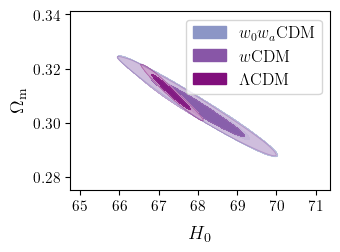

In [7]:
lcdm = loadMCSamples(path + 'full_lcdm', settings={'ignore_rows':burn_in})
wcdm = loadMCSamples(path + 'full_wcdm', settings={'ignore_rows':burn_in})
w0wa = loadMCSamples(path + 'full_w0wa', settings={'ignore_rows':burn_in})

samples = [w0wa, wcdm, lcdm]

labels = [ r'$w_0w_a$CDM', r'$w$CDM', r'$\Lambda$CDM']

g = plots.get_single_plotter(width_inch=3.5)

params = ['H0', 'omegam']

colors = ['#8c96c6', '#8856a7', '#810f7c']

g.plot_2d(samples, params, filled=True, colors = colors)

g.add_legend(labels, colored_text=False)

print(wcdm.getInlineLatex('w', limit=1))

# Figure 6 and parameter values

w0 = -0.985^{+0.071}_{-0.091}
wa = -0.18^{+0.33}_{-0.25}


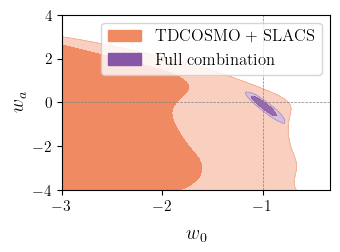

In [8]:
tdc = loadMCSamples(path + 'tdc_slacs_w0wa', settings={'ignore_rows':burn_in})
full = loadMCSamples(path + 'full_w0wa', settings={'ignore_rows':burn_in})

samples = [tdc, full]

labels = [ r'TDCOSMO + SLACS', r'Full combination']

g = plots.get_single_plotter(width_inch=3.5)

params = ['w0', 'wa']

colors = ['#ef8a62','#8856a7']

g.plot_2d(samples, params, filled=True, colors = colors)

g.add_param_markers({'w0': -1, 'wa': 0})

g.add_legend(labels, colored_text=False)

print(full.getInlineLatex('w0', limit=1))
print(full.getInlineLatex('wa', limit=1))

# $\chi^2$ values

For a given chain, the full LaTeX table of marginalised parameter values and $\chi^2$ values can be printed in the following way:

In [9]:
full_lcdm = loadMCSamples(path + 'full_lcdm', settings={'ignore_rows':burn_in})

full_lcdm.getTable(limit=1).tableTex()

'\\begin{tabular} { l  c}\n\n Parameter &  68\\% limits\\\\\n\\hline\n{\\boldmath$lambda_mst     $} & $0.902^{+0.024}_{-0.028}   $\\\\\n\n{\\boldmath$lambda_mst_sigma$} & $0.092^{+0.031}_{-0.025}   $\\\\\n\n{\\boldmath$alpha_lambda   $} & $-0.064\\pm 0.026           $\\\\\n\n{\\boldmath$a_ani          $} & $1.160^{+0.097}_{-0.36}    $\\\\\n\n{\\boldmath$a_ani_sigma    $} & $< 0.380                   $\\\\\n\n{\\boldmath$H_0            $} & $67.32\\pm 0.32             $\\\\\n\n{\\boldmath$ombh2          $} & $0.02189\\pm 0.00012        $\\\\\n\n{\\boldmath$omch2          $} & $0.11852\\pm 0.00070        $\\\\\n\n{\\boldmath$A_planck       $} & $0.9608\\pm 0.0010          $\\\\\n\n{\\boldmath$calib_100T     $} & $0.99929\\pm 0.00061        $\\\\\n\n{\\boldmath$calib_217T     $} & $0.99834\\pm 0.00062        $\\\\\n\n{\\boldmath$A_cib_217      $} & $53\\pm 6                   $\\\\\n\n{\\boldmath$xi_sz_cib      $} & $0.269^{+0.062}_{-0.27}    $\\\\\n\n{\\boldmath$A_sz           $} & $4.8\

The $\Delta \chi^2$ is then calculated via $\Delta \chi^2 =  \chi^2 - \chi^2_{\Lambda \mathrm{CDM}}$.